# Retail Lab (Fixed Effects Model)

**Learning Objectives:**
  * Define and fit fixed effects regression models
  * Gain exposure to retail related DataSets

## Context of the datasets

### 1. There are three datasets: `articles.csv.zip`, `customers.csv.zip` and `transactions2020.csv.zip`

#### 2. The Articles dataset contains information over products available.
#### 3. The Customers dataset contains information over registered customers.
#### 4. The Transactions dataset contains purchases of articles made by customers.



## 1. Library Import

In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt

In [2]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [3]:
Articles=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/articles.csv.zip")

In [4]:
Articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [5]:
Articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [6]:
Customers=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/customers.csv.zip")

In [7]:
Customers.sample(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
819580,9901288c059cf0e81e538f83c8b968ad561afc0fde8f9c...,NaN,NaN,ACTIVE,NONE,59.0,48a80a7851bd4847aea7b61ef14e769ae6df89b42d6de3...
76754,0e55760bbc1dd63d6b3111bf811d45d93042875ffc9a38...,NaN,NaN,PRE-CREATE,NONE,27.0,a11befa40864f77c00ac52842f7bf09cc3d0c06e2df1c1...
539816,64c670647f2803413e54563e0edabb86111eedc5dd0082...,1.0,1.0,ACTIVE,Regularly,31.0,a1333e375a3a007c2c0cc2093bdac7513760679cb84496...


In [8]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [9]:
Transactions=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/transactions2020.csv.zip")

In [10]:
Transactions.sample(3)

,t_dat,customer_id,article_id,price,sales_channel_id
4852189,2020-09-13,eb22a97be7b1944bae01ed72463638d66cf98b220c5ccf...,536139006,0.016932,2
4307242,2020-08-30,c41e16fa80fab9abc47f75aaa02a837c9feaa9baf66879...,874116005,0.016932,2
3246473,2020-08-04,1343f4141ed4b2af9ea661234f6812adde018fa58cdc7d...,717251001,0.016932,2


In [11]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5151470 entries, 0 to 5151469
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 196.5+ MB


## 3. Merging DataFrames

#### 3.1. Transactions-Articles


In [12]:
Transactions.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2


In [13]:
Articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [14]:
## we merge both DataFrames using the common key: article_id. We store the result in a new DataFrame
TransactionsAndArticles=pd.merge(Transactions, Articles, how='left',on='article_id')

#### 3.2. Transactions-Articles-Customers

In [15]:
TransactionsAndArticles.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2,844198,Saturn trs (J),296,Pyjama bottom,Nightwear,...,Nightwear,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Pyjama bottoms in sweatshirt fabric with wide ...
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1,777016,Cisco skirt,275,Skirt,Garment Lower body,...,Trousers & Skirt,A,Ladieswear,1,Ladieswear,18,Womens Trend,1009,Trousers,"Calf-length skirt in softly draping, patterned..."
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2,820507,Charlotte Hipster Primula,286,Underwear bottom,Underwear,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Hipster briefs in lace with a mid waist, lined..."


In [16]:
Customers.head(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [17]:
## we merge both DataFrames using the common key: customer_id. We store the result in a new DataFrame
TransactionsAndArticlesAndCustomers=pd.merge(TransactionsAndArticles, Customers, how='left',on='customer_id')

## 4. Exploratory Data Analysis

In [18]:
TransactionsAndArticlesAndCustomers.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2,844198,Saturn trs (J),296,Pyjama bottom,Nightwear,...,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Pyjama bottoms in sweatshirt fabric with wide ...,NaN,NaN,ACTIVE,NONE,40.0,0c0e15f8fa88a1d4aa6ca8a0b4a8289ca1affbaebdea22...
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1,777016,Cisco skirt,275,Skirt,Garment Lower body,...,Womens Trend,1009,Trousers,"Calf-length skirt in softly draping, patterned...",1.0,1.0,ACTIVE,Regularly,59.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2,820507,Charlotte Hipster Primula,286,Underwear bottom,Underwear,...,Womens Lingerie,1017,"Under-, Nightwear","Hipster briefs in lace with a mid waist, lined...",NaN,NaN,ACTIVE,NONE,23.0,8d4ceb946237cf52ce5c2a1a71d1221fde77627a52d661...


In [19]:
TransactionsAndArticlesAndCustomers.sample(3).T

,3549200,4071305,3441520
t_dat,2020-08-11,2020-08-25,2020-08-07
customer_id,213567b7316c2d2b78cafe6c8a1001e4def5ed55083741...,1f4ff6dd5d909316218e5dc3aa9701029b9c507e688ed6...,e72f28a80f96f07802ed1d4d9b6db69c7e082c0100e482...
article_id,913340001,871517008,880312005
price,0.041288,0.025407,0.016169
sales_channel_id,2,1,1
product_code,913340,871517,880312
prod_name,LW (J) VERONIKA Consc Trs,BROADWAY SHIRT,Delila ss
product_type_no,296,259,255
product_type_name,Pyjama bottom,Shirt,T-shirt
product_group_name,Nightwear,Garment Upper body,Garment Upper body


In [20]:
TransactionsAndArticlesAndCustomers['t_dat']=pd.to_datetime(TransactionsAndArticlesAndCustomers['t_dat'])

In [21]:
TransactionsAndArticlesAndCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5151470 entries, 0 to 5151469
Data columns (total 35 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   t_dat                         datetime64[ns]
 1   customer_id                   object        
 2   article_id                    int64         
 3   price                         float64       
 4   sales_channel_id              int64         
 5   product_code                  int64         
 6   prod_name                     object        
 7   product_type_no               int64         
 8   product_type_name             object        
 9   product_group_name            object        
 10  graphical_appearance_no       int64         
 11  graphical_appearance_name     object        
 12  colour_group_code             int64         
 13  colour_group_name             object        
 14  perceived_colour_value_id     int64         
 15  perceived_colour_value_name   ob

In [22]:
del Articles, Customers, Transactions

In [23]:
TransactionsAndArticlesAndCustomers.groupby('t_dat').count()

,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
t_dat,,,,,,,,,,,,,,,,,,,,,
2020-06-01,43084,43084,43084,43084,43084,43084,43084,43084,43084,43084,...,43084,43084,43084,43050,19110,18855,43030,42986,42950,43084
2020-06-02,44666,44666,44666,44666,44666,44666,44666,44666,44666,44666,...,44666,44666,44666,44626,18863,18659,44607,44543,44529,44666
2020-06-03,53187,53187,53187,53187,53187,53187,53187,53187,53187,53187,...,53187,53187,53187,53122,23647,23291,53124,53003,52933,53187
2020-06-04,50470,50470,50470,50470,50470,50470,50470,50470,50470,50470,...,50470,50470,50470,50427,22440,22159,50344,50334,50294,50470
2020-06-05,44470,44470,44470,44470,44470,44470,44470,44470,44470,44470,...,44470,44470,44470,44415,19500,19258,44426,44347,44332,44470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-18,39284,39284,39284,39284,39284,39284,39284,39284,39284,39284,...,39284,39284,39284,39275,17958,17679,39235,39211,39168,39284
2020-09-19,36796,36796,36796,36796,36796,36796,36796,36796,36796,36796,...,36796,36796,36796,36790,15418,15188,36725,36701,36626,36796
2020-09-20,31489,31489,31489,31489,31489,31489,31489,31489,31489,31489,...,31489,31489,31489,31482,13799,13502,31415,31408,31375,31489


In [24]:
TransactionsAndArticlesAndCustomers.groupby('sales_channel_id').count()

,t_dat,customer_id,article_id,price,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
sales_channel_id,,,,,,,,,,,,,,,,,,,,,
1,1788396,1788396,1788396,1788396,1788396,1788396,1788396,1788396,1788396,1788396,...,1788396,1788396,1788396,1786791,817650,804129,1787640,1780039,1779148,1788396
2,3363074,3363074,3363074,3363074,3363074,3363074,3363074,3363074,3363074,3363074,...,3363074,3363074,3363074,3361065,1502625,1482103,3356625,3358923,3352518,3363074


In [25]:
TransactionsAndArticlesAndCustomers.groupby('department_name').count()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
department_name,,,,,,,,,,,,,,,,,,,,,
AK Bottoms,4400,4400,4400,4400,4400,4400,4400,4400,4400,4400,...,4400,4400,4400,4400,2128,2099,4389,4393,4382,4400
AK Dresses & Outdoor,2879,2879,2879,2879,2879,2879,2879,2879,2879,2879,...,2879,2879,2879,2879,1402,1365,2872,2874,2865,2879
AK Other,113,113,113,113,113,113,113,113,113,113,...,113,113,113,113,66,63,113,113,113,113
AK Tops Jersey & Woven,390,390,390,390,390,390,390,390,390,390,...,390,390,390,390,155,153,390,390,390,390
AK Tops Knitwear,392,392,392,392,392,392,392,392,392,392,...,392,392,392,392,183,180,390,391,391,392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Girl Shoes,380,380,380,380,380,380,380,380,380,380,...,380,380,380,380,183,181,380,379,380,380
Young Girl Swimwear,699,699,699,699,699,699,699,699,699,699,...,699,699,699,699,337,330,699,697,698,699
Young Girl Trouser,952,952,952,952,952,952,952,952,952,952,...,952,952,952,952,483,477,951,952,943,952


In [26]:
TransactionsAndArticlesAndCustomers.groupby('section_name').count()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_no,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
section_name,,,,,,,,,,,,,,,,,,,,,
Baby Boy,6048,6048,6048,6048,6048,6048,6048,6048,6048,6048,...,6048,6048,6048,6048,2733,2697,6019,6018,6016,6048
Baby Essentials & Complements,16504,16504,16504,16504,16504,16504,16504,16504,16504,16504,...,16504,16504,16504,16504,6847,6739,16421,16413,16390,16504
Baby Girl,5482,5482,5482,5482,5482,5482,5482,5482,5482,5482,...,5482,5482,5482,5482,2743,2685,5458,5456,5445,5482
Boys Underwear & Basics,6105,6105,6105,6105,6105,6105,6105,6105,6105,6105,...,6105,6105,6105,6097,2906,2854,6079,6079,6069,6105
Collaborations,1611,1611,1611,1611,1611,1611,1611,1611,1611,1611,...,1611,1611,1611,1611,791,774,1607,1610,1602,1611
Contemporary Casual,30348,30348,30348,30348,30348,30348,30348,30348,30348,30348,...,30348,30348,30348,30348,14000,13820,30322,30283,30223,30348
Contemporary Smart,46340,46340,46340,46340,46340,46340,46340,46340,46340,46340,...,46340,46340,46340,46340,21878,21607,46290,46232,46158,46340
Contemporary Street,28180,28180,28180,28180,28180,28180,28180,28180,28180,28180,...,28180,28180,28180,28180,13643,13410,28155,28113,28079,28180
Denim Men,26376,26376,26376,26376,26376,26376,26376,26376,26376,26376,...,26376,26376,26376,26376,12262,12113,26351,26338,26264,26376


In [27]:
TransactionsAndArticlesAndCustomers.groupby('club_member_status').count()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_no,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,fashion_news_frequency,age,postal_code
club_member_status,,,,,,,,,,,,,,,,,,,,,
ACTIVE,5082441,5082441,5082441,5082441,5082441,5082441,5082441,5082441,5082441,5082441,...,5082441,5082441,5082441,5082441,5078877,2315032,2281184,5071449,5067537,5082441
LEFT CLUB,559,559,559,559,559,559,559,559,559,559,...,559,559,559,559,559,0,0,559,559,559
PRE-CREATE,61265,61265,61265,61265,61265,61265,61265,61265,61265,61265,...,61265,61265,61265,61265,61217,4518,4325,60629,57269,61265


In [28]:
TransactionsAndArticlesAndCustomers.groupby('fashion_news_frequency').count()



,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_no,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,age,postal_code
fashion_news_frequency,,,,,,,,,,,,,,,,,,,,,
Monthly,954,954,954,954,954,954,954,954,954,954,...,954,954,954,954,953,947,926,954,952,954
NONE,2811991,2811991,2811991,2811991,2811991,2811991,2811991,2811991,2811991,2811991,...,2811991,2811991,2811991,2811991,2809906,1212,814,2806374,2797394,2811991
Regularly,2326017,2326017,2326017,2326017,2326017,2326017,2326017,2326017,2326017,2326017,...,2326017,2326017,2326017,2326017,2324499,2318116,2284492,2325309,2321747,2326017


## 5. Evolution of sales accross time and sales channels (First Model)
### We are interested in determining the temporal evolution of sales accross the two different sales channels. To do this we fit a fixed effects model regressing `CustomerSales` on several factors.


#### We need to compute the volume of purchases made by each department first


In [42]:
TransactionsAndArticlesAndCustomers[['t_dat','customer_id','article_id','price','sales_channel_id','department_name']]

,t_dat,customer_id,article_id,price,sales_channel_id,department_name
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2,Nightwear
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1,Trousers & Skirt
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2,Expressive Lingerie
3,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,869811005,0.016932,2,Jersey
4,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,823118004,0.025407,2,Swimwear
...,...,...,...,...,...,...
5151465,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,Dresses
5151466,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,Dresses
5151467,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,Bags
5151468,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,Jewellery


In [46]:
SalesPerDepartment=TransactionsAndArticlesAndCustomers.groupby(['department_name','t_dat','sales_channel_id']).agg({'price':'sum'}).reset_index()
SalesPerDepartment.rename(columns={'price':'salesperdepartment'},inplace=True)
SalesPerDepartment

,department_name,t_dat,sales_channel_id,salesperdepartment
0,AK Bottoms,2020-06-01,2,0.613203
1,AK Bottoms,2020-06-02,2,0.533763
2,AK Bottoms,2020-06-03,1,0.042356
3,AK Bottoms,2020-06-03,2,0.842407
4,AK Bottoms,2020-06-04,1,0.088932
...,...,...,...,...
41205,Young boy Swimwear,2020-08-30,1,0.010153
41206,Young boy Swimwear,2020-09-01,1,0.011847
41207,Young boy Swimwear,2020-09-02,1,0.015237
41208,Young boy Swimwear,2020-09-07,1,0.015237


In [47]:
## We extract the month in which the transaction took place

SalesPerDepartment['month']=SalesPerDepartment['t_dat'].dt.month
SalesPerDepartment

,department_name,t_dat,sales_channel_id,salesperdepartment,month
0,AK Bottoms,2020-06-01,2,0.613203,6
1,AK Bottoms,2020-06-02,2,0.533763,6
2,AK Bottoms,2020-06-03,1,0.042356,6
3,AK Bottoms,2020-06-03,2,0.842407,6
4,AK Bottoms,2020-06-04,1,0.088932,6
...,...,...,...,...,...
41205,Young boy Swimwear,2020-08-30,1,0.010153,8
41206,Young boy Swimwear,2020-09-01,1,0.011847,9
41207,Young boy Swimwear,2020-09-02,1,0.015237,9
41208,Young boy Swimwear,2020-09-07,1,0.015237,9


In [48]:
SalesPerDepartment.set_index(['department_name', 'month'], drop=False,inplace=True)
SalesPerDepartment

department_name      t_dat  sales_channel_id  \
department_name    month                                                    
AK Bottoms         6              AK Bottoms 2020-06-01                 2   
                   6              AK Bottoms 2020-06-02                 2   
                   6              AK Bottoms 2020-06-03                 1   
                   6              AK Bottoms 2020-06-03                 2   
                   6              AK Bottoms 2020-06-04                 1   
...                                      ...        ...               ...   
Young boy Swimwear 8      Young boy Swimwear 2020-08-30                 1   
                   9      Young boy Swimwear 2020-09-01                 1   
                   9      Young boy Swimwear 2020-09-02                 1   
                   9      Young boy Swimwear 2020-09-07                 1   
                   9      Young boy Swimwear 2020-09-19                 2   

                          salesperdepartment  month  
department_name    month                             
AK Bottoms         6                0.613203      6  
                   6                0.533763      6  
                   6                0.042356      6  
                   6                0.842407      6  
                   6                0.088932      6  
...                                      ...    ...  
Young boy Swimwear 8                0.010153      8  
                   9                0.011847      9  
                   9                0.015237      9  
                   9                0.015237      9  
                   9                0.010153      9  

[41210 rows x 5 columns]

#### 5.1. Model Fit

In [73]:
#We impose a simple, linear, model:
# We specify salesperdepartment as the response variable (a.k.a dependent variable).

reg = smf.ols(formula='salesperdepartment ~ C(month)+C(sales_channel_id)', data=SalesPerDepartment)


In [74]:
#We fit the model
results = reg.fit()

In [75]:

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:     salesperdepartment   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     203.9
Date:                Tue, 13 Aug 2024   Prob (F-statistic):          1.61e-173
Time:                        11:02:54   Log-Likelihood:            -1.5207e+05
No. Observations:               41210   AIC:                         3.041e+05
Df Residuals:                   41205   BIC:                         3.042e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### 5.2. Model Interpretation


#### All the p-values are statistically significant

#### The model explains up to 1.9% of the variance (R-squared=0.019). This is probably too low to be considered an acceptable model in practice.
#### The model is statistically significant (F-test: 203.9, p-value: 0.0000)


#### Based on the above we conclude that:

* sales have been decreasing accross time (-1.02, -0.88, -0.48)

* sales in channel 2 are 2.6 units larger than sales in channel 1 (base reference)




<Axes: xlabel='month', ylabel='salesperdepartment'>

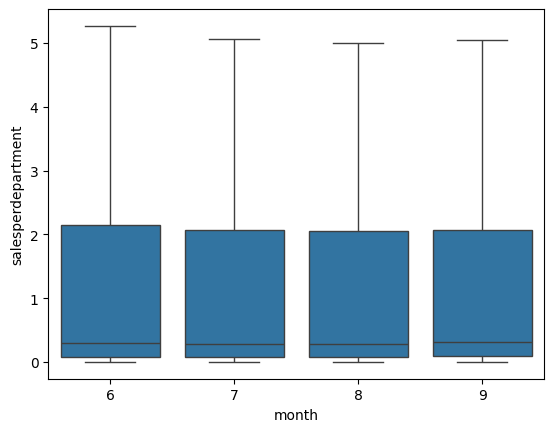

In [88]:
sns.boxplot(data=SalesPerDepartment, x="month", y="salesperdepartment", showfliers = False)

<Axes: xlabel='month', ylabel='salesperdepartment'>

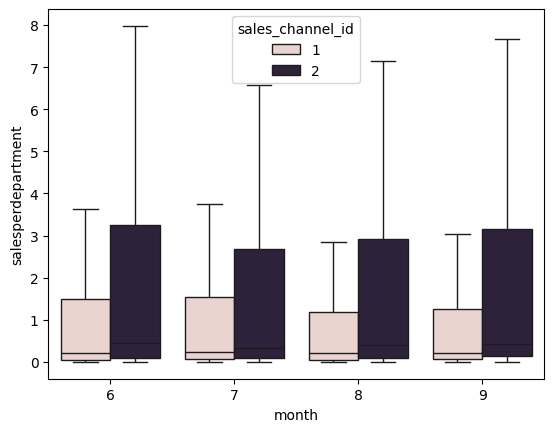

In [81]:
sns.boxplot(data=SalesPerDepartment, x="month", y="salesperdepartment", hue="sales_channel_id",showfliers = False)
